# EE634 HW1 
### Kutay Ugurlu

In [74]:
import numpy as np 
from scipy.fft import fft, ifft, fft2, ifft2, fftshift
from scipy.signal import convolve2d
from scipy.linalg import toeplitz
from matplotlib import pyplot as plt
from numpy import pi as pi 


## Q1a

$$x(n_1,n_2) = \begin{bmatrix} 1 & 1\\  1 & 1 \end{bmatrix}$$
$$x\ast h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & \frac{1}{4} & 0 \\  \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ 0 & \frac{1}{4} & \frac{1}{4} & 0 \end{bmatrix}$$

Using the linear convolutions dimension expression one can conclude that the filter is $3\times 3$. So let $$h(-n_1,-n_2) = \begin{bmatrix} a & b & c \\  d & e & f \\ g & h & i \end{bmatrix}$$ 

Using the corner elements, one can deduce that the corner elements of the filter is 0. 
With this configuration: 
* $i = 0$
* $h + i = \frac{1}{4} \implies h = \frac{1}{4}$
* $g + h = \frac{1}{4} \implies g = 0$
* $f + i = \frac{1}{4} \implies f = \frac{1}{4}$
* $e + h + f + i = 1 \implies e = \frac{1}{2}$
* $d + g + e + h = 1 \implies d = \frac{1}{4}$ <br/> $\vdots$

By using the symmetry in input and output, one can also conclude that: <br/>
* $a = c = 0$
* b = $\frac{1}{4}$

<br/>

Hence $$h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & 0 \\  \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\ 0 & \frac{1}{4} & 0 \end{bmatrix}$$



Resultant convolution matches the given.


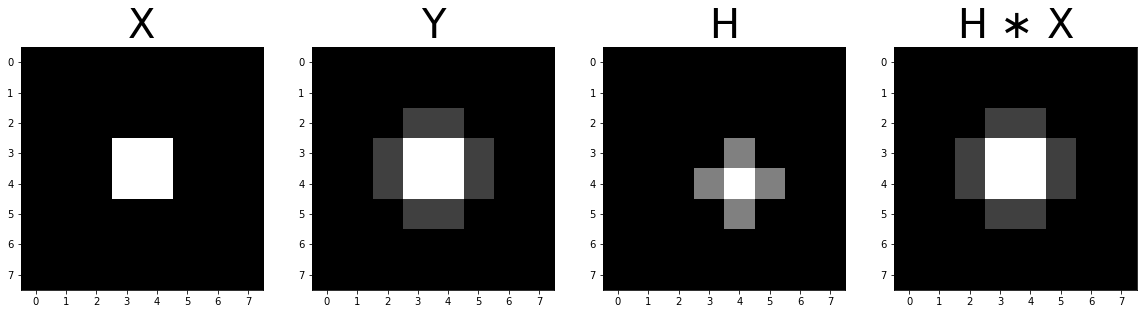

In [3]:
x = np.zeros((8,8))
x[3:5,3:5] = 1
y = np.zeros_like(x)
y[2:6,2:6] = np.array([[0,.25,.25,0],[.25,1,1,.25],[.25,1,1,.25],[0,.25,.25,0]])
h = np.zeros_like(x)
h[3:6,3:6] = np.array([[0,.25,0],[.25,.5,.25],[0,.25,0]])
y_prime = np.abs(fftshift(ifft2(fft2(x)*fft2(h))))
fsize = 40
plt.figure(figsize=(20,80))
plt.subplot(1,4,1)
plt.imshow(np.abs(x))
plt.title('X',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,2)
plt.imshow(np.abs(y))
plt.title('Y',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,3)
plt.imshow(np.abs(h))
plt.title('H',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,4)
plt.imshow(y_prime)
plt.title(r'H $\ast$ X',fontsize=fsize)
plt.set_cmap(cmap="gray")
assert np.isclose(np.sum(y_prime-y),0) 
print("Resultant convolution matches the given.")

# Q1b

In [4]:
H = h[3:6,3:6]
H

array([[0.  , 0.25, 0.  ],
       [0.25, 0.5 , 0.25],
       [0.  , 0.25, 0.  ]])

In [5]:
u = np.linalg.svd(H)
singular_values = u[1]
singular_values

array([6.83012702e-01, 1.83012702e-01, 8.77708367e-18])

## As can be seen above, we have 3 distinct singular values for the convolution kernel. For a kernel to be separable, it should be expressed as one outer product. However, when we use the SVD to decompose the matrix into outer products, we see that it has two nonzero singular values. One separable filter example can be seen below. The kernel is defined as an outer product and it has only one nonzero singular value. 

[1.31870000e+04 9.59531475e-13 0.00000000e+00]


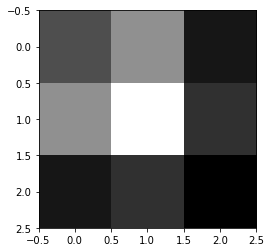

In [6]:
a = np.random.randint(0,100,(3,1))
b = np.outer(a,a)
u = np.linalg.svd(b)
singular_values = u[1]
print(singular_values)
plt.imshow(b)

# Q1c

$\begin{align} 
H(w_1,w_2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-jw_1n_1} e^{-jw_2n_2} \\ 
 &= \frac{1}{4}(e^{-jw_1}+e^{-jw_2}+e^{-jw_1}e^{-j2w_2}+e^{-j2w_1}e^{-jw_2}) + \frac{1}{4}(e^{-jw_1}e^{-jw_2}) \nonumber\\
 &= \frac{1}{4}e^{-jw_1}(1+e^{-j2w_2}) + \frac{1}{4}e^{-jw_2}(1+e^{-j2w_1}) + \frac{1}{2}(e^{-jw_1}e^{-jw_2}) \nonumber\\
 &= \frac{1}{4}e^{-jw_1}e^{-jw_2}(cos(\frac{w_1}{2})+cos(\frac{w_2}{2})) + \frac{1}{2} e^{-jw_1}e^{-jw_2} \nonumber\\
\end{align}$
$$\implies |H(w1,w2)| = \frac{1}{2} + cos(\frac{w_1}{2})+cos(\frac{w_2}{2})$$
<br/> This filter acts as low pass filter, since its magnitude have higher values around the origin. 

# Q1c
$\begin{align} 
H(k_1,k_2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi}{N_1}}k_1n_1} e^{-j{\frac{2\pi}{N_2}}k_2n_2} \\ 
\end{align}$
<br/> Since image has n1-n2 symmetry, its DFT has k1-k2 symmetry in the frequency domain, _i.e._ $H(k_1,k_2) = H(k_2,k_1)$

$\begin{align} 
H(0,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2)  = 1.5 \tag{1}\\ 
H(1,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi n_1}{3}}} \tag{2}\\ 
&= (h(0,1)+h(0,2)+h(0,3)) + (h(1,0)+h(1,1)+h(1,2))e^{-j\frac{2\pi}{3}} + (h(2,1)+h(2,2)+h(3,2))e^{-j\frac{4\pi}{3}} \nonumber\\
&= \frac{1}{4} + e^{-j\frac{2\pi}{3}} + \frac{1}{4}e^{-j\frac{4\pi}{3}} \nonumber\\
H(0,1) &= H(1,0) \tag{3}\\
H(2,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{4\pi n_1}{3}}} \tag{4}\\ 
&= (h(0,1)+h(0,2)+h(0,3)) + (h(1,0)+h(1,1)+h(1,2))e^{-j\frac{4\pi}{3}} + (h(2,1)+h(2,2)+h(3,2))e^{-j\frac{8\pi}{3}} \nonumber\\
&= \frac{1}{4} + e^{-j\frac{4\pi}{3}} + \frac{1}{4}e^{-j\frac{2\pi}{3}} \nonumber\\
H(0,2) &= H(2,0) \tag{5}\\
H(1,1) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi (n_1+n_2)}{3}}} \tag{6}\\ 
&= \sum\limits_{n_2=0}^2 e^{-j{\frac{2\pi n_2}{3}}} \left( h(0,n_2) + h(1,n_2) e^{-j{\frac{2\pi}{3}}} + h(2,n_2) e^{-j{\frac{4\pi}{3}}} \right) \nonumber \\
&= 0 \ \ (See \ calculation \ below)\nonumber \\
H(2,2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi (2n_1+2n_2)}{3}}} \tag{7}\\ 
&= \sum\limits_{n_2=0}^2 e^{-j{\frac{4\pi n_2}{3}}}  \left( h(0,n_2) + h(1,n_2) e^{-j{\frac{2\pi}{3}}} + h(2,n_2) e^{-j{\frac{4\pi}{3}}} \right) \nonumber \\
&= 0 \ \ (See \ calculation \ below)\nonumber \\
\end{align}$


In [7]:
sum = 0
for n2 in range(3):
    sum += np.exp(-1j*2*pi*n2/3) * (h[0,n2] + h[1,n2] * np.exp(-1j*2*pi/3) + h[2,n2] * np.exp(-1j*4*pi/3))
print("H(1,1) =",sum)
sum = 0
for n2 in range(3):
    sum += np.exp(-1j*4*pi*n2/3) * (h[0,n2] + h[1,n2] * np.exp(-1j*2*pi/3) + h[2,n2] * np.exp(-1j*4*pi/3))
print("H(2,2) =",sum)
        

H(1,1) = 0j
H(2,2) = 0j


## Cross Term calculation example: 

In [8]:
(0.25 + 1*np.exp(-1j*2*pi/3) + 0.25*np.exp(-1j*4*pi/3))

(-0.3749999999999999-0.6495190528383291j)

In [9]:
fft2(H)

array([[ 1.5  -0.j        , -0.375-0.64951905j, -0.375+0.64951905j],
       [-0.375-0.64951905j,  0.   +0.j        ,  0.   -0.j        ],
       [-0.375+0.64951905j,  0.   +0.j        ,  0.   -0.j        ]])

## As expected, we again obtained an low pass convolution filter. Higher frequency terms "at the edges" of the filter are zero, whereas center terms have higher magnitude. This is totally expected, since DFT is the sampled version of DTFT where $w = \frac{2\pi k}{N}$.

# Q1 e

In [10]:
def linear_conv_mat(h:np.array,output_size):
    L = h.size
    h_ex = np.zeros(output_size)
    h_ex[0:L] = h
    first_row = np.roll(np.flip(h_ex),1)
    return toeplitz(h_ex.T,first_row[0:(output_size-L+1)]) # H + X - 1 = output_size
    
def linear_conv2_mat(h:np.ndarray, image_shape):
    L1,L2 = image_shape
    N1,N2 = h.shape
    H = np.empty(((N1+L1-1)*(N2+L2-1),0))
    image_size = L1*L2
    for i in range(image_size):
        row = np.mod(i,L1)
        col = i//L1
        basis_vec = np.zeros((L1,L2))
        basis_vec[row,col] = 1
        basis_vec_output = convolve2d(h,basis_vec)
        H = np.column_stack((H, basis_vec_output.flatten()))
    return H 

In [11]:
for _ in range(50):
    N1 = np.random.randint(0,20)
    N2 = np.random.randint(0,20)
    L1 = np.random.randint(0,20)
    L2 = np.random.randint(0,20)
    H = np.random.randint(0,100,(N1,N2))
    x = np.random.randint(0,100,(L1,L2))
    H_mat = linear_conv2_mat(h=H,image_shape=x.shape)
    y_prime = convolve2d(H,x)
    y_prime_vec = H_mat.dot(x.flatten())
    y_prime_back = np.reshape(y_prime_vec,y_prime.shape,order="F")

    assert np.isclose(np.sum(y_prime-y_prime_back),0) # Check if they are the same 
print("linear_conv2_mat works")

linear_conv2_mat works


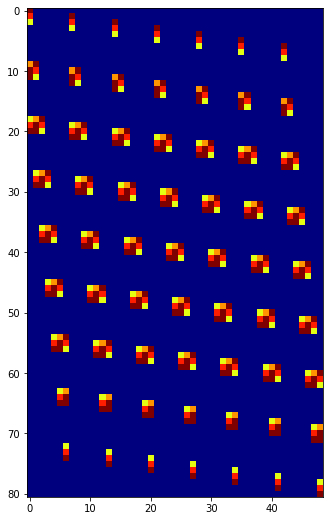

In [12]:
H = np.random.randint(5,10,(3,3))
x = np.random.randint(5,10,(7,7))
H_mat = linear_conv2_mat(h=H,image_shape=x.shape)
plt.figure(figsize=(18,9))
plt.imshow(H_mat,cmap="jet")

# Q1f 

In [68]:
def conv2_by_fft(x:np.ndarray, h:np.ndarray):
    if h.shape[0] > x.shape[0] and h.shape[1] > x.shape[1]:
        x,h = h,x
    L1,L2 = x.shape
    P1,P2 = h.shape
    rows = L1+P1-1
    cols = L2+P2-1
    Y = np.empty((rows,cols))
    for i in range(cols):
        output_col = np.zeros((rows,))
        for p in range(L2): # travel through image columns
            if i-p >= 0 and i-p < P2:
                product = np.multiply(fft(x[:,p],rows),fft(h[:,i-p],rows)) # splitted lines for debugging
                output_col += np.real(ifft(product))
                Y[:,i] = output_col
    return Y
        

## Test the function

In [73]:
for _ in range(1500):
    L1 = np.random.randint(3,15)
    L2 = np.random.randint(3,15)
    N1 = np.random.randint(1,L1-1)
    N2 = np.random.randint(1,L2-1)
    H = np.random.randint(0,100,(N1,N2))
    x = np.random.randint(0,100,(L1,L2))
    y = conv2_by_fft(x,H)
    y_prime = convolve2d(x,H)
    assert np.isclose(np.sum(y_prime-y),0) # Check if they are the same 
print("conv2_by_fft works")

conv2_by_fft works


# Q1g

Text(0.5, 1.0, 'Blurred image with \n normalized kernel')

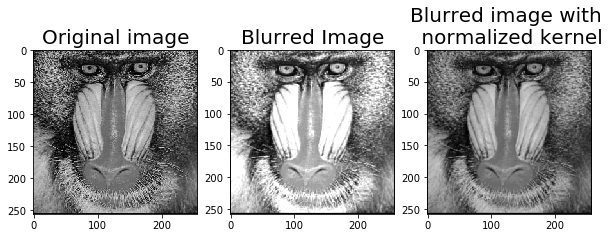

In [86]:
image = plt.imread("mandrill.bmp")
h = np.array([[0,.25,0],[.25,.5,.25],[0,.25,0]])
blurred_image = conv2_by_fft(h,image)
plt.figure(figsize=(10,40))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original image",fontsize=20)
plt.subplot(1,3,2)
plt.imshow(blurred_image,vmin=np.min(image), vmax=np.max(image))
blurred_image_normalized = conv2_by_fft(h/np.sum(h),image)
plt.title("Blurred Image",fontsize=20)
plt.subplot(1,3,3)
plt.imshow(blurred_image_normalized,vmin=np.min(image), vmax=np.max(image))
plt.title("Blurred image with \n normalized kernel",fontsize=20)



# Q2a

Text(0, 0.5, '$f_2$')

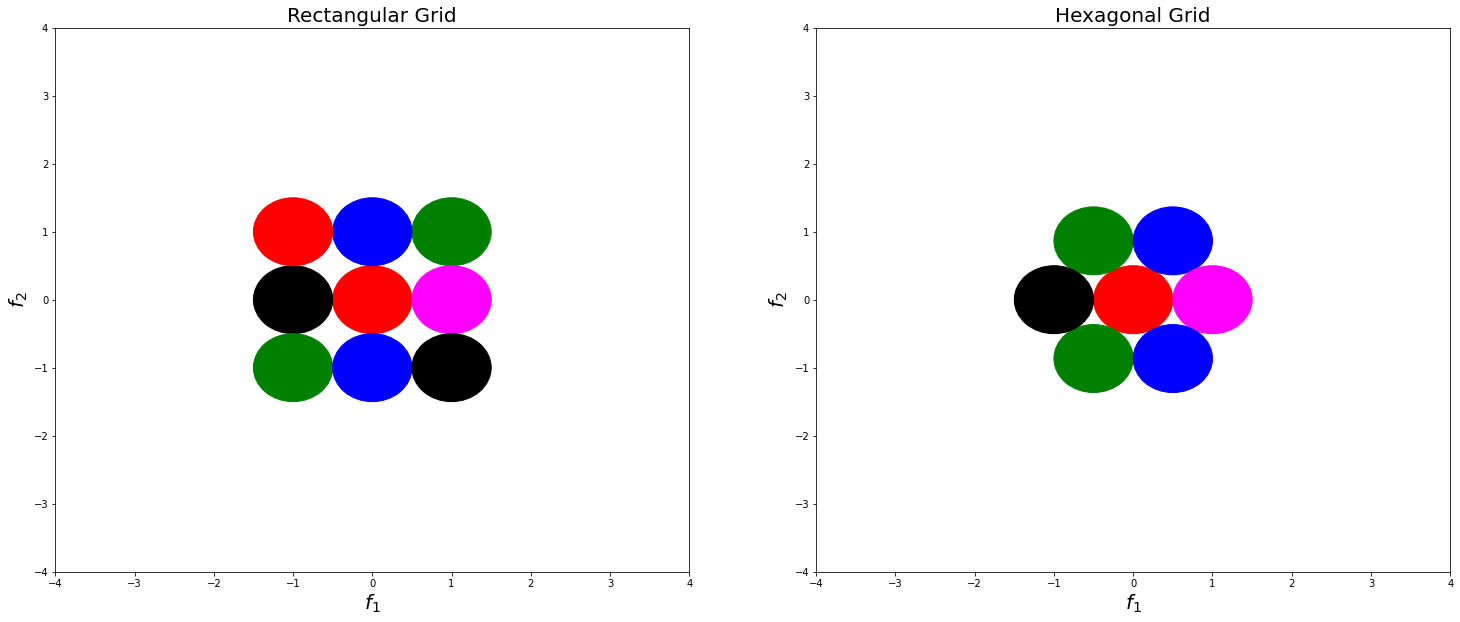

In [182]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
ax = plt.gca()
ax.cla() # clear things for fresh plot
circle1 = plt.Circle((0, 0), .5, color='r')
circle2 = plt.Circle((1, 1), .5, color='g')
circle3 = plt.Circle((0, 1), .5, color='b')
circle4 = plt.Circle((1, 0), .5, color='magenta')
circle5 = plt.Circle((-1, 0), .5, color='k')
circle6 = plt.Circle((-1, -1), .5, color='g')
circle7 = plt.Circle((0, -1), .5, color='b')
circle8 = plt.Circle((1, -1), .5, color='k')
circle9 = plt.Circle((-1, 1), .5, color='r')
# change default range so that new circles will work
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)
ax.add_patch(circle9)
plt.title("Rectangular Grid",fontsize=20)
plt.xlabel(r'$f_1$',fontsize=20)
plt.ylabel(r'$f_2$',fontsize=20)


plt.subplot(1,2,2)
ax = plt.gca()
ax.cla() # clear things for fresh plot
circle1 = plt.Circle((0, 0), .5, color='r')
circle2 = plt.Circle((-0.5, 0.5*np.sqrt(3)), .5, color='g')
circle3 = plt.Circle((0.5, 0.5*np.sqrt(3)), .5, color='b')
circle4 = plt.Circle((1, 0), .5, color='magenta')
circle5 = plt.Circle((-0.5, -0.5*np.sqrt(3)), .5, color='g')
circle6 = plt.Circle((0.5, -0.5*np.sqrt(3)), .5, color='b')
circle7 = plt.Circle((-1, 0), .5, color='k')
# change default range so that new circles will work
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
plt.title("Hexagonal Grid",fontsize=20)
plt.xlabel(r'$f_1$',fontsize=20)
plt.ylabel(r'$f_2$',fontsize=20)



In [134]:
np.zeros((64,64),np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)